<a href="https://colab.research.google.com/github/MadhumithaJM/Codsoft-/blob/main/Task_3_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (1).zip to archive (1) (2).zip


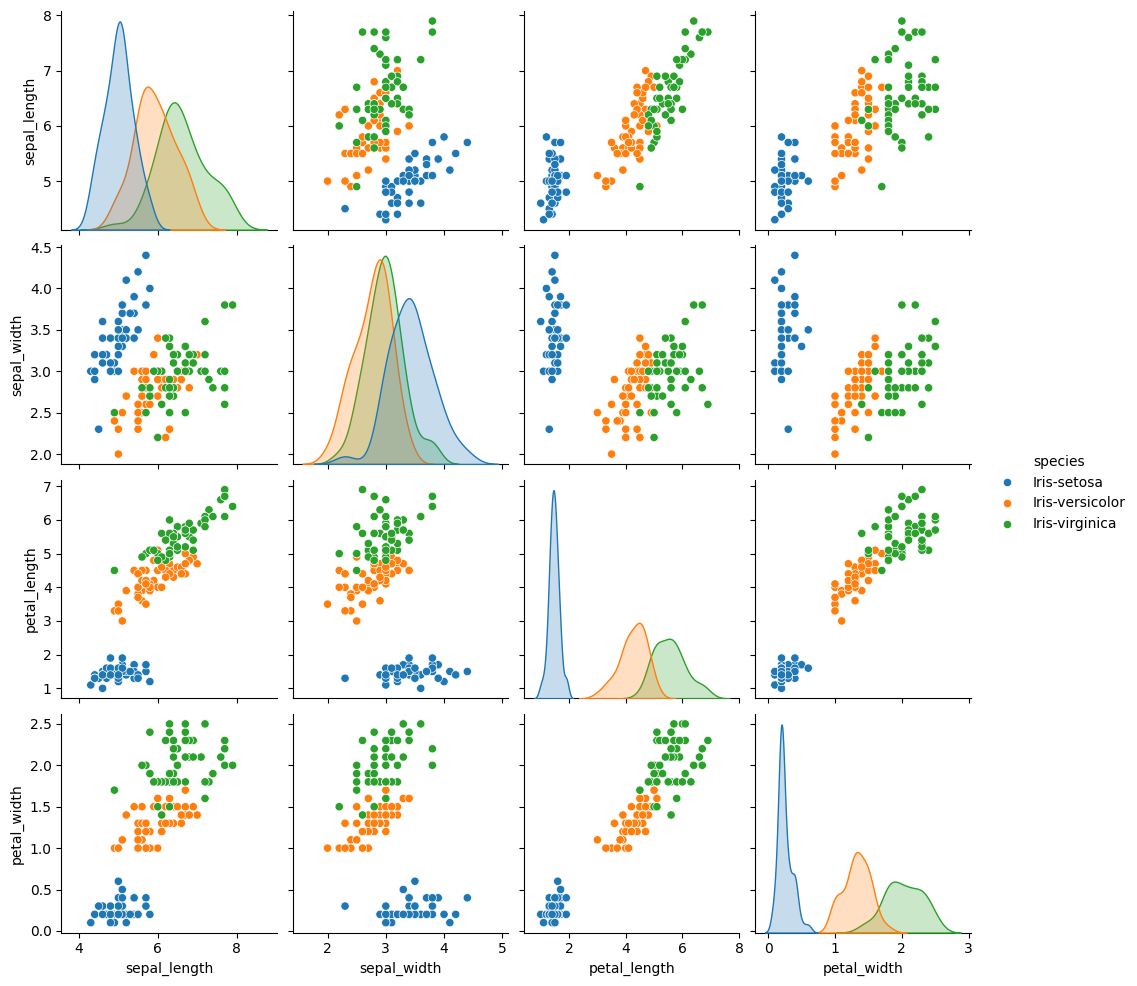

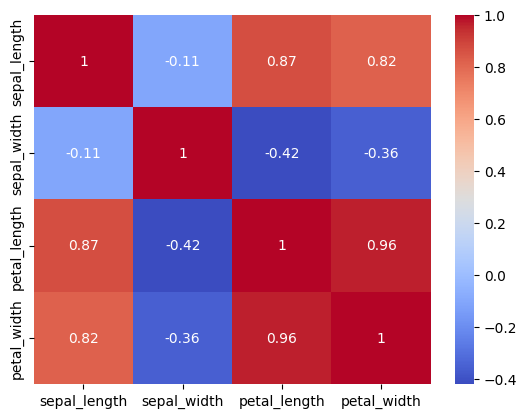

Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
Classification Report:


,precision,recall,f1-score,support
0,1.00,1.00,1.00,11.00
1,0.90,0.90,0.90,10.00
2,0.89,0.89,0.89,9.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.93,0.93,0.93,30.00
weighted avg,0.93,0.93,0.93,30.00


In [3]:
from google.colab import files
uploaded = files.upload()

import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("iris_task")

df = pd.read_csv("iris_task/IRIS.csv")
df.columns = df.columns.str.strip()
df = df.drop_duplicates()

sns.pairplot(df, hue="species")
plt.show()

sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()

X = df.drop("species", axis=1)
y = df["species"]

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(2)
print("Classification Report:")
display(report_df)